In [5]:
import pandas as pd
import numpy as np
import thinkstats2
import nsfg
import matplotlib 
import thinkplot
%matplotlib inline

### Exercise 2-3

Write a function called 'Mode' that takes a Hist and returns the most frequent value.

#### Solution:
To do this problem, let's look at a specific variable, birthwgt_lb, to solve it. 

In [7]:
preg = nsfg.ReadFemPreg()


In [9]:
#only care about live births in this case
live = preg[preg.outcome ==1]

We'll look at the histogram so we know which answer to expect. The Mode is clearly 7lbs. 

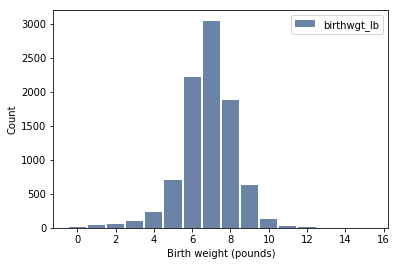

In [10]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

We'll treat the hist object like a dictionary, iterate through it, and find the by sorting by value.  

In [21]:
for k,v in sorted(hist.Items(), \
                  key = lambda x: x[1], reverse=True):
    print(k,v)

7.0 3049
6.0 2223
8.0 1889
5.0 697
9.0 623
4.0 229
10.0 132
3.0 98
2.0 53
1.0 40
11.0 26
12.0 10
0.0 8
13.0 3
14.0 3
15.0 1


And there is our answer: the mode is 7, and the next closest are 6 and 8 repsectively. 

### Exercise 2-4. 

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen's d to to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

#### Solution:
To solve this problem, we will need to first break the original pregnancy date frames into two distinct data frames: the first born and not first born.  

In [23]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]


Now that we have our two groups set up, we can calculate the CohenEffectSize, in which the function is replicated below. 

In [24]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Finally, we can call this function, for both the total weight and differences in pregnancy lengths to compare the differences. 

In [28]:
print("Pregnancy Length Cohen Effect Size: " + 
      str(CohenEffectSize(firsts.prglngth, others.prglngth)))

print("Total Weight Cohen Effect Size:    " + 
      str(CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)))


Pregnancy Length Cohen Effect Size: 0.028879044654449883
Total Weight Cohen Effect Size:    -0.088672927072602


In plain English, this means that mothers with first babies have a longer mean pregnancy length by approximately 0.03 standard deviations, which is very small. 

Furthermore, the average weight of first babies is smaller by approximately 0.09 standard deviations, which is also insignficant. 